# Matplotlib에서 제공하는 옵션 중에서 축과 격자를 설정하는 Axes.spines와 Axes.grid에 관한 내용입니다.

## 라이브러리

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

## plot_example() 함수


In [2]:

def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)

    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}",
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax


## major_formatter() 함수

In [3]:
def major_formatter(x, pos):
    return"{%.2f}"%x
formatter=FuncFormatter(major_formatter)

## 시각화 데이터 불러오기

In [4]:
tips=sns.load_dataset('tips')
tips_day=tips.groupby('day').mean().reset_index()
print(tips_day)

    day  total_bill       tip      size
0  Thur   17.682742  2.771452  2.451613
1   Fri   17.151579  2.734737  2.105263
2   Sat   20.441379  2.993103  2.517241
3   Sun   21.410000  3.255132  2.842105


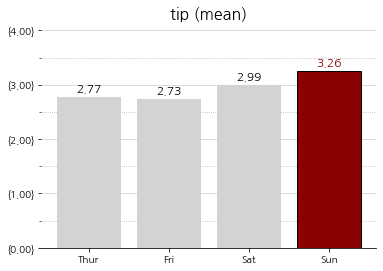

In [6]:
# spines
fig, ax=plt.subplots()
ax=plot_example(ax, zorder=2)

# 사각형 테두리 없애기
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ticker
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

# Grid
ax.grid(axis='y', which='major', color='lightgray')
ax.grid(axis='y', which='minor', ls=':')